In [1]:
import torch
import matplotlib.pyplot as plt
from time import time

In [2]:
from wasserstein import Entropic_Wasserstein, Stabilized_Entropic_Wasserstein

In [3]:
def show_P(P):
    P = P.to('cpu')
    
    fig, ax = plt.subplots(1, 2)

    ax[0].imshow(P)
    ax[0].set_title('P')

    max_P, idx = torch.max(P, dim=1, keepdim=True)
    X = (P>=max_P).int() #* 10

    ax[1].imshow(X)
    ax[1].set_title('argmax rows of P')

In [4]:
# randomly create point cloud x, y

n = 1000
x = torch.randn((n, 2)) * 10

y = x.clone() + 50

px = torch.ones(x.shape[0])
px /= px.sum()

py = torch.ones(y.shape[0])
py /= py.sum()

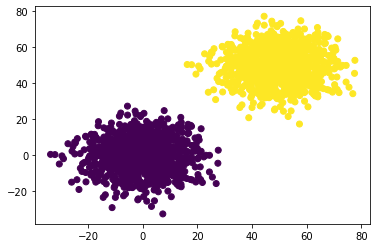

In [5]:
# visualize the points in 2D

points = torch.cat((x,y), dim=0)
colors = torch.cat((torch.zeros(x.shape[0]), torch.ones(y.shape[0])), dim=0)

plt.scatter(points[:,0], points[:, 1], c=colors)

### set device = 'cpu' for clearer comparision

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu') 

In [7]:
x = x.to(device)
y = y.to(device)
px = px.to(device)
py = py.to(device)

print(device)

cpu


### The original Entropic_Wassertein is faster than the stabilized version

The codes of the original entropic wasserstein is faster. 

Computed in 0.4505 s
w_cost: 5018.77717


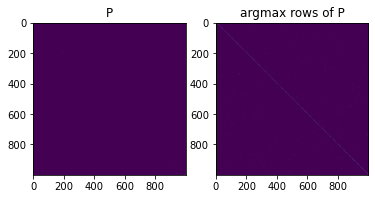

In [9]:
wdist = Entropic_Wasserstein(eps=20, max_iter=500, thresh=1e-5)

t0 = time()
w_cost, P = wdist(x, y, px, py)
print('Computed in %.4f s' %(time() - t0))
print('w_cost: %.5f' %(w_cost))

show_P(P)

Computed in 6.4438 s
w_cost: 5018.74219


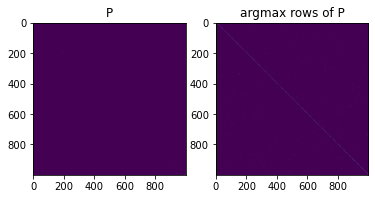

In [10]:
stable_wdist = Stabilized_Entropic_Wasserstein(eps=20, max_iter=500, thresh=1e-5)

t0 = time()
w_cost, P = stable_wdist(x, y, px, py)
print('Computed in %.4f s' %(time() - t0))
print('w_cost: %.5f' %(w_cost))

show_P(P)

### But less stable
The original entropic wasserstein is prone to numerical unstable (overflow, underflow) if eps is too small compare to elements of C (cost matrix).

In [10]:
wdist = Entropic_Wasserstein(eps=5, max_iter=500, thresh=1e-5)

t0 = time()
w_cost, P = wdist(x, y, px, py)
print('Computed in %.4f s' %(time() - t0))
print('w_cost: %.5f' %(w_cost))

P

Computed in 0.1191 s
w_cost: nan


tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='cuda:0',
       dtype=torch.float64)

### The stabilized version is stable
It is not prone to underflow, overflow when the values of eps is small compare to elements of C (cost matrix). \
\
The smaller eps is, the closer w_cost is to the real optimal transport cost, and the learned transport plan P is sparser (focused on the Monge line). (Computational Optimal Transport, chapter 4.1, figure 4.2).
\
\
However, smaller eps deteriorates the convergence, i.e longer time to compute.


Computed in 0.5510 s
w_cost: 5003.94568


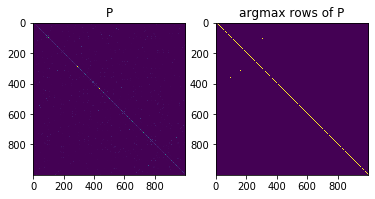

In [11]:
stable_wdist = Stabilized_Entropic_Wasserstein(eps=5, max_iter=500, thresh=1e-5)

t0 = time()
w_cost, P = stable_wdist(x, y, px, py)
print('Computed in %.4f s' %(time() - t0))
print('w_cost: %.5f' %(w_cost))

show_P(P)

Computed in 0.4726 s
w_cost: 4955.12366


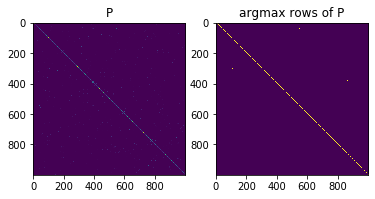

In [12]:
stable_wdist = Stabilized_Entropic_Wasserstein(eps=2, max_iter=500, thresh=1e-5)

t0 = time()
w_cost, P = stable_wdist(x, y, px, py)
print('Computed in %.4f s' %(time() - t0))
print('w_cost: %.5f' %(w_cost))

show_P(P)

Computed in 0.9487 s
w_cost: 4959.21590


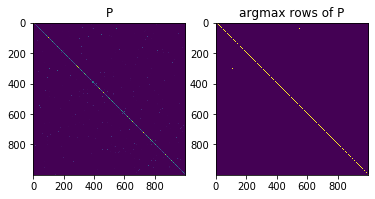

In [13]:
stable_wdist = Stabilized_Entropic_Wasserstein(eps=1, max_iter=1000, thresh=1e-5)

t0 = time()
w_cost, P = stable_wdist(x, y, px, py)
print('Computed in %.4f s' %(time() - t0))
print('w_cost: %.5f' %(w_cost))

show_P(P)

Computed in 9.5633 s
w_cost: 4976.23451


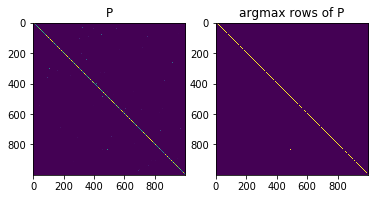

In [14]:
stable_wdist = Stabilized_Entropic_Wasserstein(eps=1e-1, max_iter=10000, thresh=1e-5)

t0 = time()
w_cost, P = stable_wdist(x, y, px, py)
print('Computed in %.4f s' %(time() - t0))
print('w_cost: %.5f' %(w_cost))

show_P(P)